In [3]:
import pandas as pd

# Read CSV file
df = pd.read_csv("kc_house_data.csv")

# Display first 5 rows
print(df.head())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from pygam import LinearGAM, s, l
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("kc_house_data.csv")  # Update with actual file path

# Select relevant features (modify based on available features)
features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
target = "SalePrice"

# Drop missing values
df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Simple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print(f"Linear Regression RMSE: {rmse_lin:.2f}")

# 2. Polynomial Regression (Degree 2)
poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly.fit(X_train, y_train)
y_pred_poly = poly.predict(X_test)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(f"Polynomial Regression (Degree 2) RMSE: {rmse_poly:.2f}")

# 3. Spline Regression using Generalized Additive Models (GAM)
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5))
gam.fit(X_train, y_train)
y_pred_gam = gam.predict(X_test)
rmse_gam = np.sqrt(mean_squared_error(y_test, y_pred_gam))
print(f"Spline Regression (GAM) RMSE: {rmse_gam:.2f}")

# Cross-validation for model evaluation
cv_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_cv = np.sqrt(-cv_scores.mean())
print(f"Cross-Validation RMSE: {rmse_cv:.2f}")

# Plot Residuals for Diagnostics
plt.scatter(y_test, y_pred_lin - y_test, alpha=0.5, label="Linear Regression")
plt.scatter(y_test, y_pred_poly - y_test, alpha=0.5, label="Polynomial Regression", color='r')
plt.scatter(y_test, y_pred_gam - y_test, alpha=0.5, label="Spline Regression", color='g')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Residuals")
plt.legend()
plt.title("Residual Plot")
plt.show()


KeyError: ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']

In [2]:
!pip install pandas

In [3]:
pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 2.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/8.0 MB 2.0 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/8.0 MB 1.1 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.0 MB 1.1 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/8.0 MB 814.4 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/8.0 MB 860.0 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.0 MB 860.0 kB/s eta 0:00:08
   --------- ------------------------------ 1.8/8.0 MB 981.1 kB/s eta 0:00:07
   ----------- ---------------------------- 2.4/8.0 MB 1.2 MB/s eta 0:00:05
   -------------- ------------------------- 2.9/8.0 MB 1.3 MB/s eta 0:00:05
   ---------------- ----------

In [5]:
pip install scikit-learn



  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 517.1 kB/s eta 0:00:21
   - -------------------------------------- 0.5/11.1 MB 517.1 kB/s eta 0:00:21
   -- ------------------------------------- 0.8/11.1 MB 679.1 kB/s eta 0:00:16
   --- ------------------------------------ 1.0/11.1 MB 750.9 kB/s eta 0:00:14
   --- ------------------------------------ 1.0/11.1 MB 750.9 kB/s eta 0:00:14
   --- ------------------------------------ 1.0/11.1 MB 750.9 kB/s eta 0:00:14
   --- ------------------------------------ 1.0/11.1 MB 750.9 kB/s eta 0:00:14
   --- ---------------------------

In [8]:
!pip install pygam


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 505.7 kB/s eta 0:00:03
   ----------------- ---------------------- 0.8/1.8 MB 609.4 kB/s eta 0:00:02
   ---------------------- ----------------- 1.0/1.8 MB 805.1 kB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.8 MB 805.1 kB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 773.1 kB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 773.1 kB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 773.1 kB/s eta 0:00:01
   ---------------------------------- --

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from pygam import LinearGAM, s, l
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("kc_house_data.csv")  # Update with actual file path

# Select relevant features (modify based on available features)
features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "condition", "grade", "sqft_above", "sqft_basement", "yr_built"]
target = "price"  # "SalePrice" should be replaced with "price" since that's in your dataset

# Drop missing values
df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]


In [11]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Linear Regression RMSE: 242398.63
Polynomial Regression (Degree 2) RMSE: 228466.54
Spline Regression (GAM) RMSE: 245689.68
Cross-Validation RMSE: 223549.62


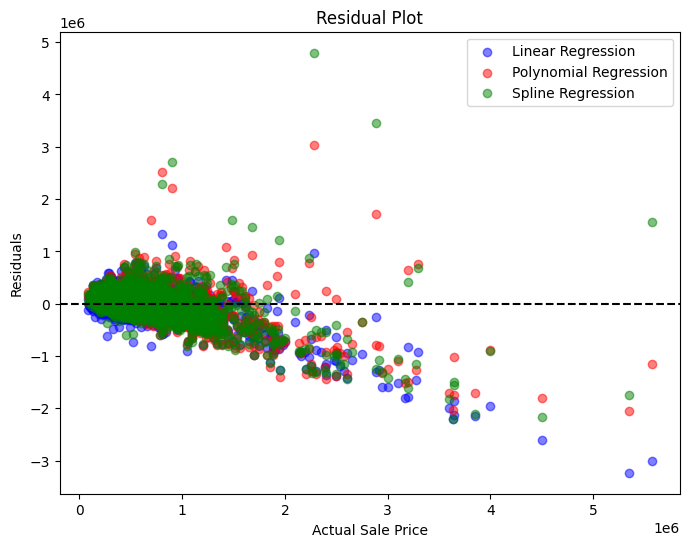

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from pygam import LinearGAM, s
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("kc_house_data.csv")  # Ensure the file is in the correct path

# Select relevant features (based on available columns in your dataset)
features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "condition", 
            "grade", "sqft_above", "sqft_basement", "yr_built"]
target = "price"  # Updated target column

# Drop missing values
df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Simple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print(f"Linear Regression RMSE: {rmse_lin:.2f}")

# 2. Polynomial Regression (Degree 2)
poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly.fit(X_train, y_train)
y_pred_poly = poly.predict(X_test)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(f"Polynomial Regression (Degree 2) RMSE: {rmse_poly:.2f}")

# 3. Spline Regression using Generalized Additive Models (GAM)
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9))
gam.fit(X_train, y_train)
y_pred_gam = gam.predict(X_test)
rmse_gam = np.sqrt(mean_squared_error(y_test, y_pred_gam))
print(f"Spline Regression (GAM) RMSE: {rmse_gam:.2f}")

# Cross-validation for model evaluation
cv_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_cv = np.sqrt(-cv_scores.mean())
print(f"Cross-Validation RMSE: {rmse_cv:.2f}")

# Plot Residuals for Diagnostics
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin - y_test, alpha=0.5, label="Linear Regression", color='b')
plt.scatter(y_test, y_pred_poly - y_test, alpha=0.5, label="Polynomial Regression", color='r')
plt.scatter(y_test, y_pred_gam - y_test, alpha=0.5, label="Spline Regression", color='g')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Residuals")
plt.legend()
plt.title("Residual Plot")
plt.show()
